## **MNIST**

In [1]:
import keras
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = mnist.load_data()

 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))

 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

In [3]:
X_train, y_train, X_test, y_test = load_dataset()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### **Network**

In [7]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [8]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
 
	opt = Adam(learning_rate=0.01)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [9]:
model = define_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [11]:
type(model)

keras.engine.sequential.Sequential

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=256)

Epoch 1/25
235/235 [==============================] - 8s 12ms/step - loss: 135.9489 - accuracy: 0.4911 - val_loss: 1.5496 - val_accuracy: 0.5743
Epoch 2/25
235/235 [==============================] - 2s 10ms/step - loss: 1.2129 - accuracy: 0.6306 - val_loss: 0.9792 - val_accuracy: 0.6998
Epoch 3/25
235/235 [==============================] - 4s 17ms/step - loss: 0.9074 - accuracy: 0.7370 - val_loss: 0.8048 - val_accuracy: 0.7743
Epoch 4/25
235/235 [==============================] - 2s 10ms/step - loss: 0.6912 - accuracy: 0.8122 - val_loss: 0.6802 - val_accuracy: 0.8462
Epoch 5/25
235/235 [==============================] - 2s 8ms/step - loss: 0.5750 - accuracy: 0.8512 - val_loss: 0.5907 - val_accuracy: 0.8854
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.4926 - accuracy: 0.8773 - val_loss: 0.5318 - val_accuracy: 0.8817
Epoch 7/25
235/235 [==============================] - 2s 10ms/step - loss: 0.4319 - accuracy: 0.8906 - val_loss: 0.4787 - val_accuracy: 0.8938

In [13]:
model.save('model.h5')

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.8108406662940979
Test accuracy: 0.815500020980835


In [19]:
# plot diagnostic learning curves
def show_plot():
 # plot loss
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 plt.show()
 # plot accuracy
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')
 plt.show()

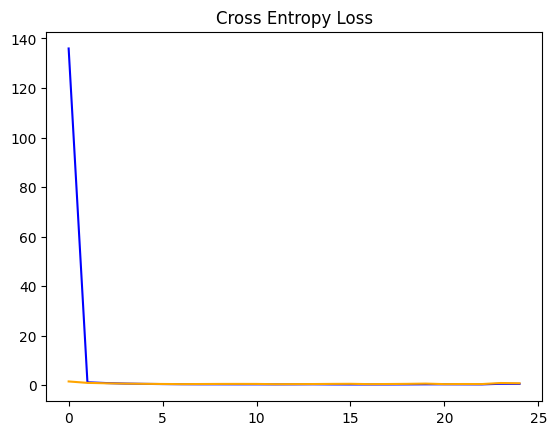

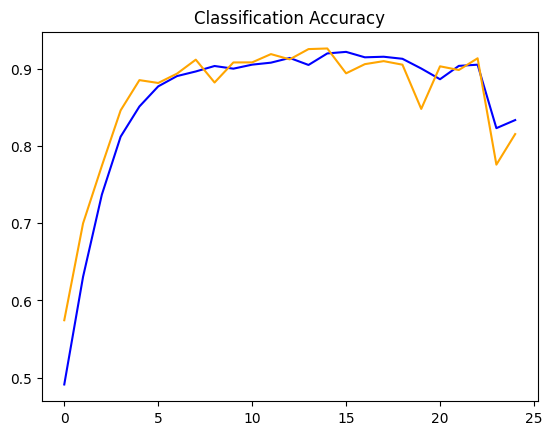

In [20]:
show_plot()